<a href="https://colab.research.google.com/github/Nacho2904/CURSO-LEARNING1/blob/tareas/tarea_de_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea de dl

## setup

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing

In [2]:
def reset_weights(model):
    for l in model.layers:
        if hasattr(l,"kernel_initializer"):
            l.kernel.assign(l.kernel_initializer(tf.shape(l.kernel)))
        if hasattr(l,"bias_initializer"):
            l.bias.assign(l.bias_initializer(tf.shape(l.bias)))
        if hasattr(l,"recurrent_initializer"):
            l.recurrent_kernel.assign(l.recurrent_initializer(tf.shape(l.recurrent_kernel)))


## I) Aproximación universal

### I-I, clasificación

#### I-I-I

Generar una base de datos de una XOR con todas las posibles combinaciones de
±1 (4 casos). Asignar los labels correspondientes (1 si ambas entradas son diferentes,
0 si son iguales)

In [ ]:
# Utilizo ⊕ para denotar el operador XOR entre dos elementos
X = np.array([1,0,1,0,1,1,1,1,0,0,0,0]).reshape(4,3)
df_xor = pd.DataFrame(X)
df_xor.columns = ["Value of X", "Value of Y", "Value of X⊕Y"]
df_xor

,Value of X,Value of Y,Value of X⊕Y
0,1,0,1
1,0,1,1
2,1,1,0
3,0,0,0


#### I-I-II

Entrenar una red neuronal con activación ReLU que alcance 100 % de accuracy.
¿Cuál es la mínima dimensión de la unidad oculta para lograr esto?

In [ ]:
input = tf.keras.layers.Input(shape = (2,), name = "Input_layer")
x_1 = tf.keras.layers.Dense(4, name = "First_hidden_unit", activation = "ReLU")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 First_hidden_unit (Dense)   (None, 4)                 12        
                                                                 
 dense_16 (Dense)            (None, 1)                 5         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


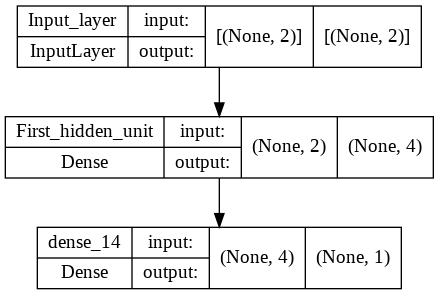

In [ ]:
tf.keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.3),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=df_xor[["Value of X", "Value of Y"]], y=df_xor["Value of X⊕Y"], batch_size = 4, epochs=300,callbacks=[early_stop]);

Epoch 1/300
1/1 [==============================] - 0s 297ms/step - loss: 0.7205 - accuracy: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 10ms/step - loss: 0.7149 - accuracy: 0.5000
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 0.7091 - accuracy: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 7ms/step - loss: 0.7039 - accuracy: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 11ms/step - loss: 0.6985 - accuracy: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 0.6886 - accuracy: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 9ms/step - loss: 0.6839 - accuracy: 0.5000
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 0.6791 - accuracy: 0.5000
Epoch 10/300
1/1 [==============================] - 0s 7ms/step - loss: 0.6745 - accuracy: 0.5000
Epoch 11/300
1/1 [=======

#### I-I-III

repetir con activación sigmoide. Extraer conclusiones.

In [ ]:
input = tf.keras.layers.Input(shape = (2,), name = "Input_layer")
x_1 = tf.keras.layers.Dense(2, name = "First_hidden_unit", activation = "sigmoid")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_72"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 2)]               0         
                                                                 
 First_hidden_unit (Dense)   (None, 2)                 6         
                                                                 
 dense_31 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=10),loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])
hist = model.fit(x=df_xor[["Value of X", "Value of Y"]], y=df_xor["Value of X⊕Y"], batch_size = 4, epochs=300,callbacks=[early_stop]);

Epoch 1/300
1/1 [==============================] - 0s 303ms/step - loss: 0.7504 - accuracy: 0.5000
Epoch 2/300
1/1 [==============================] - 0s 5ms/step - loss: 0.9954 - accuracy: 0.5000
Epoch 3/300
1/1 [==============================] - 0s 7ms/step - loss: 1.3741 - accuracy: 0.5000
Epoch 4/300
1/1 [==============================] - 0s 6ms/step - loss: 1.3919 - accuracy: 0.5000
Epoch 5/300
1/1 [==============================] - 0s 6ms/step - loss: 1.0541 - accuracy: 0.5000
Epoch 6/300
1/1 [==============================] - 0s 10ms/step - loss: 1.0693 - accuracy: 0.5000
Epoch 7/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0667 - accuracy: 0.5000
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0639 - accuracy: 0.5000
Epoch 9/300
1/1 [==============================] - 0s 7ms/step - loss: 1.0603 - accuracy: 0.5000
Epoch 10/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0574 - accuracy: 0.5000
Epoch 11/300
1/1 [========

### I-II) Regresión

#### I-II-I

Generar una base de datos de la función f (x, y, z) = sin(x) + cos(y) + z. Para ello
barra una grilla de 20 puntos para cada coordenada (0 ≤ x < 2π, 0 ≤ y < 2π y
0 ≤ z ≤ 1) y arme una base de datos con las 8000 combinaciones posibles.

In [ ]:
f = lambda x,y,z: np.sin(x) + np.cos(y) + z
x_axis = np.arange(0,2*np.pi, np.pi/10)
y_axis = np.arange(0,2*np.pi, np.pi/10)
z_axis = np.arange(0,1,1/20)

x_y_z_coordinates = [[x,y,z] for x in x_axis for y in y_axis for z in z_axis]
df_function = pd.DataFrame(x_y_z_coordinates)
df_function.columns = ["x", "y", "z"]
df_function["f(x,y,z)"] = f(df_function["x"],df_function["y"],df_function["z"])
df_function

,x,y,z,"f(x,y,z)"
0,0.000000,0.000000,0.00,1.00000
1,0.000000,0.000000,0.05,1.05000
2,0.000000,0.000000,0.10,1.10000
3,0.000000,0.000000,0.15,1.15000
4,0.000000,0.000000,0.20,1.20000
...,...,...,...,...
7995,5.969026,5.969026,0.75,1.39204
7996,5.969026,5.969026,0.80,1.44204
7997,5.969026,5.969026,0.85,1.49204
7998,5.969026,5.969026,0.90,1.54204


#### I-II-II

Entrenar una red neuronal con activación ReLU e indique el error cuadrático medio. Grafique f(x, x, x) y comparela con la salida del regresor barriendo x.

In [ ]:
input = tf.keras.layers.Input(3, name="Input_layer")
x_1 = tf.keras.layers.Dense(128, input_dim = 3, activation = "ReLU")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_99"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 dense_66 (Dense)            (None, 128)               512       
                                                                 
 dense_67 (Dense)            (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),loss='MeanSquaredError')
hist = model.fit(x=df_function[["x", "y", "z"]], y=df_function["f(x,y,z)"], batch_size = len(df_function), epochs=10000,callbacks=[es])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 15ms/step - loss: 0.1076
Epoch 7502/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1076
Epoch 7503/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1076
Epoch 7504/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.1075
Epoch 7505/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 7506/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 7507/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.1075
Epoch 7508/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 7509/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1075
Epoch 7510/10000
1/1 [==============================] - 0s 16ms/step - loss: 0.1075
Epoch 7511/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.1075
Epoch 7512/10000
1/1 [====================

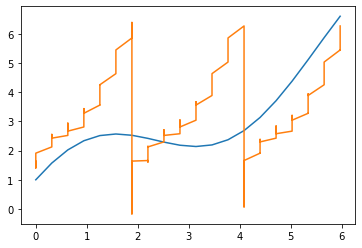

In [ ]:
df_function["f(x,x,x)"] = f(df_function["x"], df_function["x"], df_function["x"])
df_function
xxx_matrix = np.array([df_function["x"],df_function["x"],df_function["x"]]).reshape(8000,3)
predicted_f_xxx = model.predict(xxx_matrix)
plt.plot(df_function["x"], df_function["f(x,x,x)"])
plt.plot(df_function["x"], predicted_f_xxx);

#### I-II-III

In [ ]:
input = tf.keras.layers.Input(3, name="Input_layer")
x_1 = tf.keras.layers.Dense(128, input_dim = 3, activation = "sigmoid")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_101"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 dense_70 (Dense)            (None, 128)               512       
                                                                 
 dense_71 (Dense)            (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.015),loss='MeanSquaredError')
hist = model.fit(x=df_function[["x", "y", "z"]], y=df_function["f(x,y,z)"], batch_size = len(df_function), epochs=10000,callbacks=[es])

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 16ms/step - loss: 0.1561
Epoch 7502/10000
1/1 [==============================] - 0s 15ms/step - loss: 0.1561
Epoch 7503/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1561
Epoch 7504/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.1561
Epoch 7505/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1560
Epoch 7506/10000
1/1 [==============================] - 0s 13ms/step - loss: 0.1560
Epoch 7507/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1560
Epoch 7508/10000
1/1 [==============================] - 0s 14ms/step - loss: 0.1560
Epoch 7509/10000
1/1 [==============================] - 0s 257ms/step - loss: 0.1559
Epoch 7510/10000
1/1 [==============================] - 0s 24ms/step - loss: 0.1559
Epoch 7511/10000
1/1 [==============================] - 0s 26ms/step - loss: 0.1559
Epoch 7512/10000
1/1 [===================

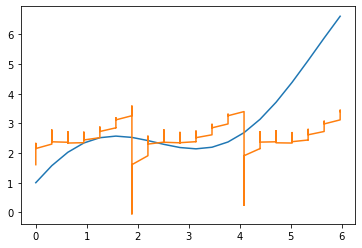

In [ ]:
predicted_f_xxx = model.predict(xxx_matrix)
plt.plot(df_function["x"], df_function["f(x,x,x)"])
plt.plot(df_function["x"], predicted_f_xxx);

In [ ]:
def reset_weights(model):
    for l in model.layers:
        if hasattr(l,"kernel_initializer"):
            l.kernel.assign(l.kernel_initializer(tf.shape(l.kernel)))
        if hasattr(l,"bias_initializer"):
            l.bias.assign(l.bias_initializer(tf.shape(l.bias)))
        if hasattr(l,"recurrent_initializer"):
            l.recurrent_kernel.assign(l.recurrent_initializer(tf.shape(l.recurrent_kernel)))

input = tf.keras.layers.Input(3, name="Input_layer")
x_1 = tf.keras.layers.Dense(128, input_dim = 3, activation = "ReLU")(input)
output = tf.keras.layers.Dense(1)(x_1)
model = tf.keras.models.Model(inputs = input, outputs = output)
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 3)]               0         
                                                                 
 dense_10 (Dense)            (None, 128)               512       
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


Usando SGD en vez de GD tradicional

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
hists = []
learning_rates = [0.01, 0.1, 1, 0.0001]
for lr in learning_rates:
  model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr),loss='MeanSquaredError')
  hists.append(model.fit(x=df_function[["x", "y", "z"]], y=df_function["f(x,y,z)"], batch_size = 64, epochs=50,callbacks=[es]))
  reset_weights(model)


Epoch 1/50
125/125 [==============================] - 0s 1ms/step - loss: 0.7647
Epoch 2/50
125/125 [==============================] - 0s 2ms/step - loss: 0.5203
Epoch 3/50
125/125 [==============================] - 0s 1ms/step - loss: 0.4523
Epoch 4/50
125/125 [==============================] - 0s 2ms/step - loss: 0.4078
Epoch 5/50
125/125 [==============================] - 0s 2ms/step - loss: 0.3733
Epoch 6/50
125/125 [==============================] - 0s 1ms/step - loss: 0.3428
Epoch 7/50
125/125 [==============================] - 0s 2ms/step - loss: 0.3131
Epoch 8/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2898
Epoch 9/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2673
Epoch 10/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2459
Epoch 11/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2276
Epoch 12/50
125/125 [==============================] - 0s 2ms/step - loss: 0.2160
Epoch 13/50
125/125 [====

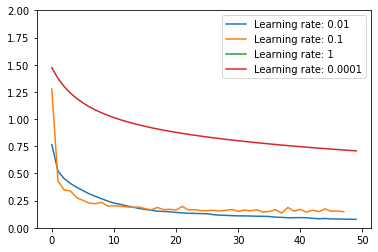

In [ ]:
for i in range(len(hists)):
  plt.plot(np.arange(0,len(hists[i].history["loss"]), 1), hists[i].history["loss"], label=f"Learning rate: {learning_rates[i]}");
plt.legend()
plt.ylim(0,2);
# la idea era reproducir algo similar a las curvas de entrenamiento en https://cs231n.github.io/neural-networks-3/.

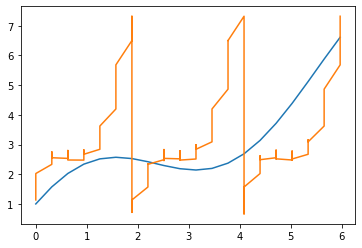

In [ ]:
df_function["f(x,x,x)"] = f(df_function["x"], df_function["x"], df_function["x"])
df_function
xxx_matrix = np.array([df_function["x"],df_function["x"],df_function["x"]]).reshape(8000,3)
predicted_f_xxx = model.predict(xxx_matrix)
plt.plot(df_function["x"], df_function["f(x,x,x)"])
plt.plot(df_function["x"], predicted_f_xxx);

## III) Regularización

### III.I. Autoencoder

#### Autoencoder

Con FASHION-MNIST construir un autoencoder (utilizar la base de datos como entrenamiento/validación).

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (validation_images, validation_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


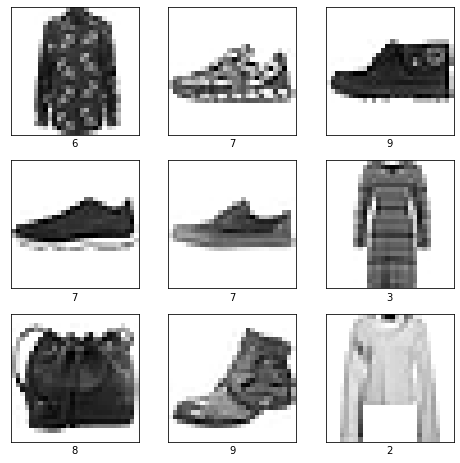

In [ ]:
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(train_labels[img_index])

In [ ]:
batch_size = 32
hidden_units = 256
learning_rate = 0.001
image_vector_length = train_images.shape[1]*train_images.shape[2]

input = tf.keras.layers.Input(shape = (28,28), name="Input_layer")
flatten_input = tf.keras.layers.Flatten()(input)
normalize = tf.keras.layers.Normalization(axis=-1)(flatten_input)
encode = tf.keras.layers.Dense(units = hidden_units, activation = "ReLU", kernel_initializer = tf.keras.initializers.HeNormal())(flatten_input)
decode = tf.keras.layers.Dense(image_vector_length, kernel_initializer = tf.keras.initializers.HeNormal())(encode)
reshape_to_image_and_output = tf.keras.layers.Reshape((28,28))(decode)

model_autoencoder = tf.keras.models.Model(inputs = input, outputs = reshape_to_image_and_output)
model_autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 784)               201488    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 402,448
Trainable params: 402,448
Non-trainable params: 0
_________________________________________________________________


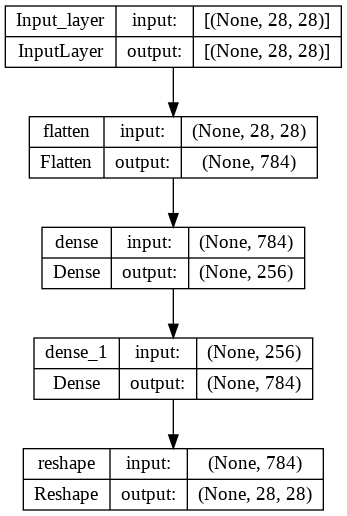

In [ ]:
tf.keras.utils.plot_model(model_autoencoder, "Arquitectura del autoencoder.png", show_shapes=True)

In [ ]:
reset_weights(model_autoencoder)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),loss= "MeanSquaredError")
hist = model_autoencoder.fit(x=train_images, y=train_images, batch_size = batch_size,
                             epochs=300, validation_data=(validation_images, validation_images),callbacks=[es])


Epoch 1/300
1875/1875 [==============================] - 7s 3ms/step - loss: 3697.9817 - val_loss: 1919.2844
Epoch 2/300
1875/1875 [==============================] - 4s 2ms/step - loss: 1639.5651 - val_loss: 1421.1193
Epoch 3/300
1875/1875 [==============================] - 4s 2ms/step - loss: 1274.2318 - val_loss: 1150.0396
Epoch 4/300
1875/1875 [==============================] - 4s 2ms/step - loss: 1054.6628 - val_loss: 977.1932
Epoch 5/300
1875/1875 [==============================] - 4s 2ms/step - loss: 912.0082 - val_loss: 858.3340
Epoch 6/300
1875/1875 [==============================] - 4s 2ms/step - loss: 810.6486 - val_loss: 772.7527
Epoch 7/300
1875/1875 [==============================] - 5s 2ms/step - loss: 739.7806 - val_loss: 714.7827
Epoch 8/300
1875/1875 [==============================] - 4s 2ms/step - loss: 690.5594 - val_loss: 673.6387
Epoch 9/300
1875/1875 [==============================] - 4s 2ms/step - loss: 654.7355 - val_loss: 640.3766
Epoch 10/300
1875/1875 [======

KeyboardInterrupt: ignored

#### III.I.I)

Al finalizar reportar error cuadrático medio de validación.

In [ ]:
error_final = hist.history["val_loss"][-1]
print(f"El ECM de validación final fue {error_final}")

El ECM de validación final fue 254.6407928466797


#### III.I.II)

 Guardar el modelo en un archivo h5 (lo van a necesitar mas tarde).

In [ ]:
model_autoencoder.save('autoencoder.h5')

#### III.I.III)

A partir del error cuadrático construya un detector de anomalías (sin volver a
entrenar). Reportar el Equal-Error-Rate en el conjunto de datos resultante de
combinar los datos de validación de FASHION-MNIST con los de MNIST (20000
muestras en total).

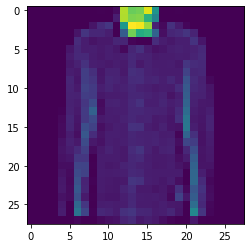

In [ ]:
plt.imshow(train_images[33]);

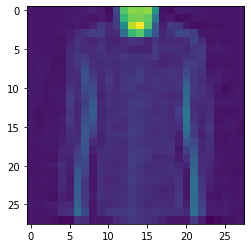

In [ ]:
apply_autoencoder = lambda image: model_autoencoder.predict(image.reshape(1,28,28)).reshape(28,28)
plt.imshow(apply_autoencoder(train_images[33]));

In [ ]:
mnist = tf.keras.datasets.mnist
(mnist_train_images, mnist_train_labels), (mnist_validation_images, mnist_validation_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


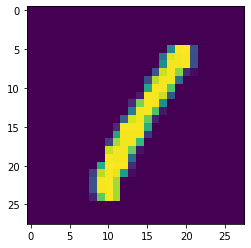

In [ ]:
plt.imshow(mnist_train_images[3]);

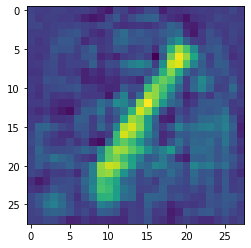

In [ ]:
plt.imshow(apply_autoencoder(mnist_train_images[3]));

In [ ]:
mean_squared_error = np.mean(np.array([np.linalg.norm(image - apply_autoencoder(image)) for image in train_images[:1000]]))
mean_squared_error

514.37256

In [ ]:
fashion_mean_squared_error = np.mean(np.array([np.linalg.norm(image - apply_autoencoder(image)) for image in mnist_train_images[:1000]]))
fashion_mean_squared_error

1444.412

In [ ]:
detect_outlier_with_threshold = lambda image,threshold: np.linalg.norm(image - apply_autoencoder(image)) > threshold
get_tpr = lambda threshold: sum([detect_outlier_with_threshold(mnist_train_images[i], threshold) for i in range(0,100)])/100
get_fpr = lambda threshold: sum([detect_outlier_with_threshold(train_images[i], threshold) for i in range(0,100)])/100

values = np.arange(0.6,5,0.01)
y_axis = [get_tpr(mean_squared_error*value) for value in values]
x_axis = [get_fpr(mean_squared_error*value) for value in values]

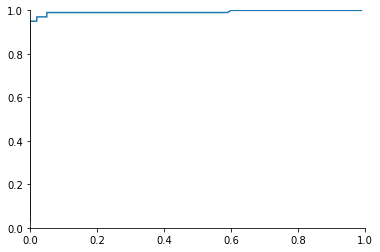

In [ ]:
ax = plt.subplot(111)
ax.plot(x_axis, y_axis)
plt.xlim(0,1)
plt.ylim(0,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

#### IIII.I.IV)

Obtenga los valores de las unidades de menor dimensión de su autoencoder tanto
para entrenamiento como para validación (FASHION-MNIST). Con ellos construya
una nueva base de datos y guarde los data-frames

In [ ]:
encoder = tf.keras.models.Model(inputs = input, outputs = encode)
for layer_index in range(0,len(encoder.layers)):
  encoder.layers[layer_index].set_weights(model_autoencoder.layers[layer_index].get_weights())

In [ ]:
encoded_training_images = np.append(encoder.predict(train_images), train_labels.reshape(len(train_labels),1), axis = -1)
encoded_validation_images = np.append(encoder.predict(validation_images), validation_labels.reshape(len(validation_labels),1), axis = -1)
full_dataset = np.append(encoded_training_images, encoded_validation_images, axis = 0)

In [ ]:
df_lower_dims = pd.DataFrame(full_dataset)
df_lower_dims = df_lower_dims.rename(columns={256:"label"})
df_lower_dims.loc["label"] = df_lower_dims["label"].astype("category")
df_lower_dims.to_csv("fashion_mnist_dimension_reducida.csv")

### III.II Clasificación

CIFAR-10 (está en keras) contiene imágenes RGB de 32×32 (en total dimensión 3072)
para hacer clasicación de objetos. 

#### III.II.I

Observar algunos ejemplos de imágenes de CIFAR. Una buena opción para ésto es
utilizar imshow de pyplot.

In [ ]:
cifar = tf.keras.datasets.cifar10
(train_images, train_labels), (validation_images, validation_labels) = cifar.load_data()

170508288/170498071 [==============================] - 3s 0us/step


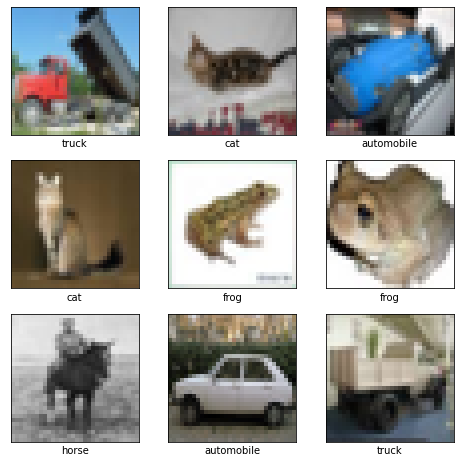

In [ ]:
int_label_to_str_label = {
    0:"airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  img_index = np.random.randint(0, train_images.shape[0])
  plt.imshow(train_images[img_index], cmap="gray_r")
  plt.xlabel(int_label_to_str_label[int(train_labels[img_index])]);

#### III.II.II

Construir un clasicador utilizando la base de datos como entrenamiento/validación.

In [ ]:
train_images.shape

(50000, 32, 32, 3)

In [ ]:
batch_size = 64
hidden_units = 2048
learning_rate = 0.01
number_of_classes = 10
image_vector_length = train_images.shape[1]*train_images.shape[2]*3

input = tf.keras.layers.Input(shape = (32, 32, 3), name="Input_layer")
flatten_input = tf.keras.layers.Flatten()(input)
normalizer = tf.keras.layers.Normalization(axis = -1)(flatten_input)
hidden = tf.keras.layers.Dense(hidden_units, activation = "ReLU", kernel_initializer = tf.keras.initializers.HeNormal())(normalizer)
output = tf.keras.layers.Dense(number_of_classes, input_dim = hidden_units, activation = "softmax")(hidden)
model_cifar_classifier = tf.keras.models.Model(inputs = input, outputs = output)
model_cifar_classifier.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_layer (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 flatten_16 (Flatten)        (None, 3072)              0         
                                                                 
 normalization_14 (Normaliza  (None, 3072)             6145      
 tion)                                                           
                                                                 
 dense_29 (Dense)            (None, 2048)              6293504   
                                                                 
 dense_30 (Dense)            (None, 10)                20490     
                                                                 
Total params: 6,320,139
Trainable params: 6,313,994
Non-trainable params: 6,145
____________________________________________

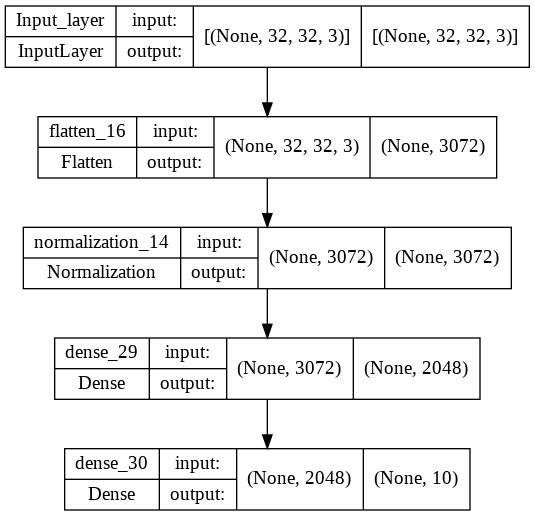

In [ ]:
tf.keras.utils.plot_model(model_cifar_classifier, "arquitecturaDelClasificador.png", show_shapes=True)

In [ ]:
reset_weights(model_cifar_classifier)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_cifar_classifier.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                               )
hist = model_cifar_classifier.fit(x=train_images, y=train_labels, batch_size = batch_size,
                             epochs=300, validation_data=(validation_images, validation_labels),callbacks=[es])


Epoch 1/300


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - 4s 4ms/step - loss: 47.8225 - val_loss: 28.7033
Epoch 2/300
782/782 [==============================] - 3s 4ms/step - loss: 24.6484 - val_loss: 21.4609
Epoch 3/300
782/782 [==============================] - 3s 4ms/step - loss: 19.2257 - val_loss: 16.9241
Epoch 4/300
782/782 [==============================] - 3s 4ms/step - loss: 14.7398 - val_loss: 18.5306
Epoch 5/300
782/782 [==============================] - 3s 4ms/step - loss: 13.2410 - val_loss: 9.9652
Epoch 6/300
782/782 [==============================] - 3s 4ms/step - loss: 11.4650 - val_loss: 11.9742
Epoch 7/300
782/782 [==============================] - 3s 4ms/step - loss: 10.2538 - val_loss: 12.8289
Epoch 8/300
782/782 [==============================] - 3s 4ms/step - loss: 9.1565 - val_loss: 8.8389
Epoch 9/300
782/782 [==============================] - 3s 4ms/step - loss: 8.1479 - val_loss: 8.0206
Epoch 10/300
782/782 [==============================] - 3s 3ms/step - loss: 7.5054 - val_l

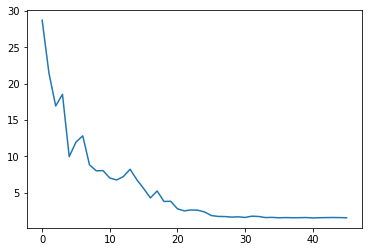

In [ ]:
plt.plot(np.arange(0,len(hist.history["loss"])), hist.history["val_loss"]);

#### III.II.III

 Reportar el accuracy de validación.

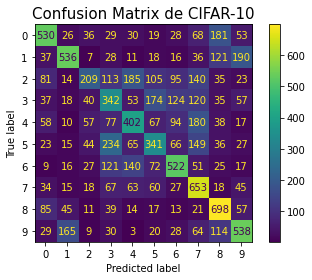

In [ ]:
y_predicted = [int(np.where(output == np.max(output))[0]) for output in model_cifar_classifier.predict(validation_images)]
cm = metrics.confusion_matrix(validation_labels, y_predicted, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cm_display = metrics.ConfusionMatrixDisplay(cm).plot()
plt.title("Confusion Matrix de CIFAR-10", fontsize = 15);

In [ ]:
metrics.accuracy_score(validation_labels, y_predicted)

0.4771

### III.III Regresión

El archivo molinos.csv contiene datos de potencias acumuladas por un parque eólico
para los diferentes vientos. La columna Velocity contiene el módulo del viento en ese
instante y la comulna Direction el ángulo de la velocidad medido en sentido horario
ubicando el cero en vientos que provienen del norte. Finalmente las columnas P contiene
las potencias acumuladas por cada molino.

#### III.III.I

Curado de datos: Tirar todas las las de datos donde haya alguna potencia negativa. Las mismas no tienen sentido, son simplemente errores de medición.

In [3]:
df_molinos = pd.read_csv("https://raw.githubusercontent.com/CSC-CONICET/CURSO-LEARNING1/main/datasets/molinos.csv")
df_molinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128550 entries, 0 to 128549
Data columns (total 45 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   P_1        128550 non-null  float64
 1   P_2        128550 non-null  float64
 2   P_3        128550 non-null  float64
 3   P_4        128550 non-null  float64
 4   P_5        128550 non-null  float64
 5   P_6        128550 non-null  float64
 6   P_7        128550 non-null  float64
 7   P_8        128550 non-null  float64
 8   P_9        128550 non-null  float64
 9   P_10       128550 non-null  float64
 10  P_11       128550 non-null  float64
 11  P_12       128550 non-null  float64
 12  P_13       128550 non-null  float64
 13  P_14       128550 non-null  float64
 14  P_15       128550 non-null  float64
 15  P_16       128550 non-null  float64
 16  P_17       128550 non-null  float64
 17  P_18       128550 non-null  float64
 18  P_19       128550 non-null  float64
 19  P_20       128550 non-n

In [4]:
df_molinos.describe()

,P_1,P_2,P_3,P_4,P_5,P_6,P_7,P_8,P_9,P_10,...,P_36,P_37,P_38,P_39,P_40,P_41,P_42,P_43,Velocity,Direction
count,128550.000000,128550.000000,128550.000000,128550.000000,128550.000000,128550.000000,128550.000000,128550.000000,128550.000000,128550.000000,...,128550.000000,128550.000000,128550.000000,128550.000000,128550.000000,128550.000000,128550.000000,128550.000000,128550.000000,128550.000000
mean,826.809888,849.526605,771.091421,749.073322,736.400814,748.896666,758.703056,780.045043,752.568288,773.698596,...,746.182095,742.600821,715.290873,720.538214,719.467295,724.841126,722.761695,766.205475,7.513559,212.211435
std,672.816294,672.172727,658.539641,655.688666,654.282235,653.671235,657.049057,659.220266,645.995974,660.177185,...,640.812135,638.826516,628.812017,628.804150,629.653646,631.082470,628.173255,640.077194,3.580964,100.983611
min,-39.900000,-38.200000,-36.600000,-30.100000,-39.900000,-39.900000,-40.000000,-40.500000,-39.700000,-35.900000,...,-40.400000,-37.500000,-41.800000,-40.600000,-37.200000,-36.800000,-39.700000,-36.000000,0.300000,0.000000
25%,198.400000,219.800000,173.500000,159.200000,151.900000,162.525000,168.100000,182.100000,178.600000,177.700000,...,180.300000,181.400000,168.425000,173.600000,170.600000,172.700000,175.500000,196.125000,4.900000,140.000000
50%,649.400000,690.800000,562.900000,531.800000,510.600000,534.700000,546.200000,581.300000,547.650000,567.250000,...,541.900000,537.300000,508.700000,516.500000,513.900000,523.100000,524.600000,583.700000,7.000000,244.000000
75%,1579.475000,1616.400000,1445.775000,1398.800000,1377.100000,1394.000000,1421.400000,1462.100000,1375.100000,1454.975000,...,1344.300000,1335.700000,1254.200000,1267.700000,1267.375000,1278.600000,1265.100000,1372.175000,9.700000,284.000000
max,1801.400000,1801.700000,1802.700000,1801.800000,1802.000000,1801.500000,1801.200000,1801.800000,1801.200000,1801.900000,...,1801.800000,1801.200000,1801.700000,1800.600000,1801.000000,1802.100000,1801.400000,1801.900000,25.700000,359.000000


In [5]:
#eliminamos las que tienen alguna potencia negativa
df_molinos_filtered = df_molinos.copy()
for column in df_molinos.columns[::-1]:
  df_molinos_filtered = df_molinos_filtered[df_molinos_filtered[column] > 0]

#### III.III.II

Pasar las velocidades a coordenadas cartesianas

In [6]:
df_molinos_filtered["Direction"] = df_molinos["Direction"] - 90
df_molinos_filtered["Vx"] = df_molinos["Velocity"]*np.cos(df_molinos["Direction"])
df_molinos_filtered["Vy"] = -df_molinos["Velocity"]*np.sin(df_molinos["Direction"])
df_molinos_filtered = df_molinos_filtered.drop(columns = ["Direction", "Velocity"])

 #### III.III.III

Entrenar un regresor que estime la velocidad del viento (dos dimensiones cartesianas) en función de las potencias. Para ello separar los datos como crea conveniente.

In [7]:
#separamos 90/5/5 datos de entrenamiento, validación y testeo
data = np.array(df_molinos_filtered)
np.random.shuffle(data)
train_inputs = data[:int(data.shape[0]*0.9),:-2]
train_targets = data[:int(data.shape[0]*0.9),-2:]
validation_inputs = data[int(data.shape[0]*0.9):int(data.shape[0]*0.95),:-2]
validation_targets = data[int(data.shape[0]*0.9):int(data.shape[0]*0.95),-2:]
test_inputs = data[int(data.shape[0]*0.95):,:-2]
test_targets = data[int(data.shape[0]*0.95):,-2:]


In [51]:
depth = 50
width = 20
activation = "ReLU"

input = tf.keras.layers.Input(shape=(train_inputs.shape[1],))
hidden_layers = [tf.keras.layers.Dense(width- int(0.3*i), activation = activation, kernel_initializer = tf.keras.initializers.HeNormal())
                  for i in range(0,depth)]

for i in range(0, depth):
  if i==0:
    hidden_layers[i] = hidden_layers[i](input)
  else:
    hidden_layers[i] = hidden_layers[i](hidden_layers[i-1])

regress = tf.keras.layers.Dense(2, kernel_initializer = tf.keras.initializers.HeNormal())(hidden_layers[-1])

model_molinos = tf.keras.models.Model(inputs = input, outputs = regress)
model_molinos.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 43)]              0         
                                                                 
 dense_145 (Dense)           (None, 20)                880       
                                                                 
 dense_146 (Dense)           (None, 20)                420       
                                                                 
 dense_147 (Dense)           (None, 20)                420       
                                                                 
 dense_148 (Dense)           (None, 20)                420       
                                                                 
 dense_149 (Dense)           (None, 19)                399       
                                                                 
 dense_150 (Dense)           (None, 19)                380

In [52]:
reset_weights(model_molinos)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
model_molinos.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),loss='MeanSquaredError')
hist = model_molinos.fit(x=train_inputs, y=train_targets, batch_size = 64, epochs=100 ,callbacks=[es],
                 validation_data=(validation_inputs, validation_targets))

Epoch 1/100
1160/1160 [==============================] - 15s 7ms/step - loss: 40.7404 - val_loss: 41.7124
Epoch 2/100
1160/1160 [==============================] - 9s 8ms/step - loss: 40.7091 - val_loss: 41.6929
Epoch 3/100
1160/1160 [==============================] - 8s 7ms/step - loss: 40.7037 - val_loss: 41.6851
Epoch 4/100
1160/1160 [==============================] - 10s 9ms/step - loss: 40.7019 - val_loss: 41.6824
Epoch 5/100
1160/1160 [==============================] - 9s 7ms/step - loss: 40.7005 - val_loss: 41.6818
Epoch 6/100
1160/1160 [==============================] - 8s 7ms/step - loss: 40.7001 - val_loss: 41.6799
Epoch 7/100
1160/1160 [==============================] - 8s 7ms/step - loss: 40.6997 - val_loss: 41.6776
Epoch 8/100
1160/1160 [==============================] - 8s 7ms/step - loss: 40.6992 - val_loss: 41.6774
Epoch 9/100
1160/1160 [==============================] - 9s 8ms/step - loss: 40.6988 - val_loss: 41.6797
Epoch 10/100
1160/1160 [=============================

In [53]:
prediction = model_molinos.predict(validation_inputs)
prediction

129/129 [==============================] - 1s 3ms/step


array([[ 0.05069804,  0.03544679],
       [ 0.06474917,  0.08689301],
       [ 0.02299854, -0.01400364],
       ...,
       [ 0.02248858, -0.01481764],
       [ 0.03999107,  0.01312   ],
       [ 0.02296424, -0.01405839]], dtype=float32)

In [44]:
validation_targets

array([[ 3.46742321, 12.11350388],
       [ 9.30003573,  9.50785651],
       [-3.97813441, -1.63231328],
       ...,
       [ 7.06087344, -1.85312339],
       [-5.45522753,  5.98752809],
       [ 3.78795777,  0.30228446]])

In [54]:
from sklearn.metrics import mean_squared_error
mean_squared_error(prediction, validation_targets)

41.68509852874921

In [55]:
mean_squared_error(model_molinos.predict(test_inputs), test_targets)

129/129 [==============================] - 1s 5ms/step


41.3798930456515

In [59]:
model_molinos.save("modelo_molinos.h5")

#### III.III.IV

Crear un script que levante el modelo entrenado y permita probarlo. Tiene que
devolver el error cuadrático medio (básicamente esto signica que hay un set de
datos que no les paso que lo voy a usar para probar su algoritmo). Tenga en cuenta
que el formato de los datos será el mismo que este dataset (módulo y fase en sentido
horario con respecto al viento del norte)

In [ ]:
#en el github